# color masking with openCV

Install:
```sh
conda create --name opencv --file package-list.txt
```
    
Use:
    
```sh
source activate opencv
```

Photo from http://www.jbcharleston.jb.mil/News/Photos/igphoto/2000417879/ under Public Domain

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

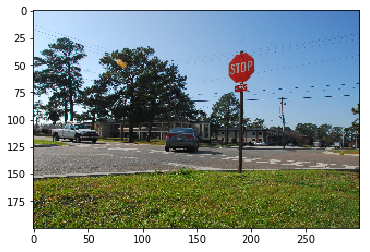

In [115]:
image = cv2.imread('stopsign.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (300, 200)) 
original = np.copy(image)
plt.imshow(image)

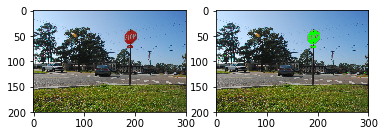

In [116]:
lower_red = np.array([100,0,0]) 
upper_red = np.array([255,50,80])

# Mask the image 
masked_image = np.copy(image)
mask = cv2.inRange(masked_image, lower_red, upper_red)

masked_image[np.where(mask > 0)] = [0, 255, 0]

# Display it
plt.subplot(121)
plt.imshow(original)
plt.subplot(122)
plt.imshow(masked_image)

# image warping on business card

Image taken from https://www.flickr.com/photos/26158205@N04/5123561523 under CC BY-SA 2.0

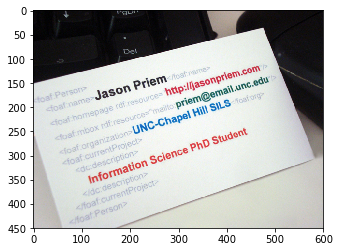

In [112]:
image = cv2.imread('business_card.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original = np.copy(image)
plt.imshow(image)

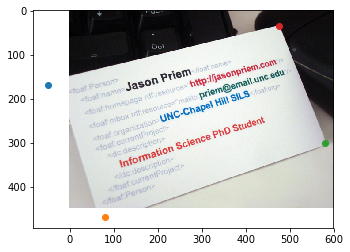

In [64]:
# define corner points in original image to straighten out
original_points = np.float32([
    [-50, 170],
    [80, 470],
    [580, 300],
    [475, 35]
])

plt.imshow(image)

for p in original_points:
    plt.plot(p[0], p[1], 'o')

In [65]:
# define target points to transform to
target_width = 600
target_height = 350
target_points = np.float32([
    [0, 0],
    [0, target_height],
    [target_width, target_height],
    [target_width, 0]
])

In [66]:
# define transformation matrix
M = cv2.getPerspectiveTransform(original_points, target_points)
print(M)

[[  9.14525308e-01  -3.96294300e-01   1.13096296e+02]
 [  2.69503092e-01   1.04806758e+00  -1.64696334e+02]
 [ -2.35604047e-04   3.67938539e-05   1.00000000e+00]]


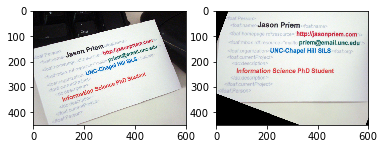

In [114]:
# transform & plot
plt.subplot(121)
plt.imshow(original)

plt.subplot(122)
image_size = (image.shape[1], image.shape[0])
transformed = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
plt.imshow(transformed)

# edge detection / filters / kernels
image taken from https://commons.wikimedia.org/wiki/File:Marbach_am_Neckar,_Stadtbefestigung,_Oberer_Torturm-20160917_-002.jpg under CC BY-SA 4.0

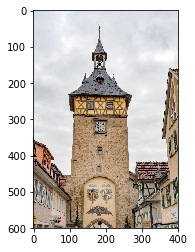

In [103]:
image = cv2.imread('torturm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400, 600)) 

original = np.copy(image)
plt.imshow(image)

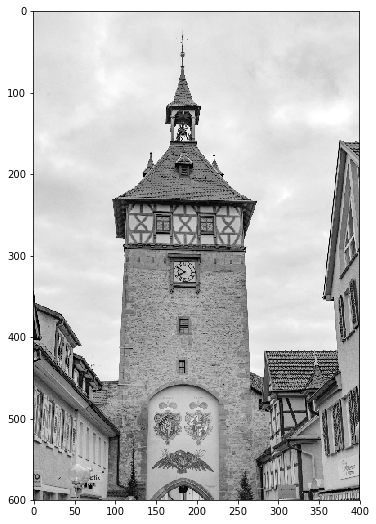

In [104]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(14, 9))
plt.imshow(gray, cmap='gray')

In [107]:
# edge kernel
## Sobel filter
k_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

k_horizontal = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])
k_edge = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

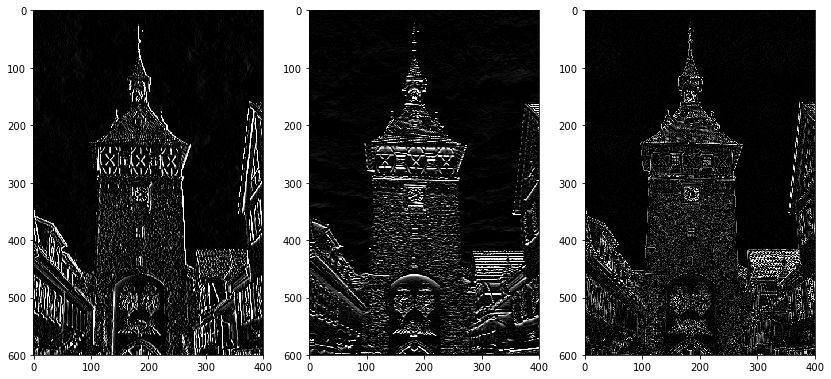

In [110]:
fig = plt.figure(figsize=(14, 9)) 
plt.subplot(1, 3, 1)
filtered_vertical = cv2.filter2D(gray, -1, k_vertical)
plt.imshow(filtered_vertical, cmap='gray')
plt.subplot(1, 3, 2)
filtered_horizontal = cv2.filter2D(gray, -1, k_horizontal)
plt.imshow(filtered_horizontal, cmap='gray')
plt.subplot(1, 3, 3)
filtered_edge = cv2.filter2D(gray, -1, k_edge)
plt.imshow(filtered_edge, cmap='gray')

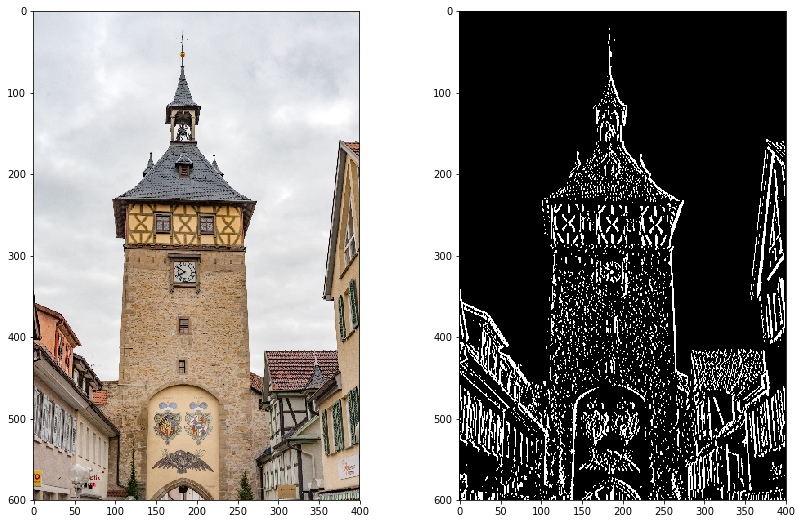

In [111]:
# turn to binary edge-only image
_, binary_image = cv2.threshold(filtered_vertical, 60, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(14, 9))
plt.subplot(1, 2, 1)
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')

# lowpass filter for blurring / reducing noise

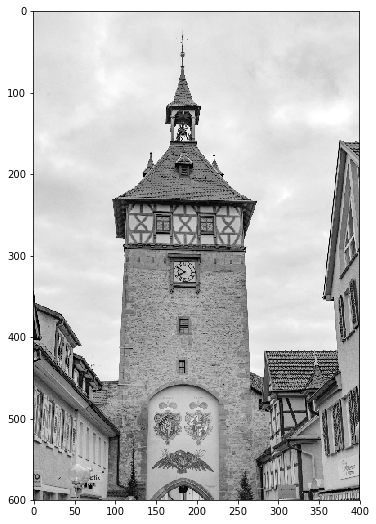

In [118]:
image = cv2.imread('torturm.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (400, 600)) 

original = np.copy(image)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(14, 9))
plt.imshow(gray, cmap='gray')

In [126]:
# lowpass
k = np.ones((4, 4))
k = k / k.size
print(k)

[[ 0.0625  0.0625  0.0625  0.0625]
 [ 0.0625  0.0625  0.0625  0.0625]
 [ 0.0625  0.0625  0.0625  0.0625]
 [ 0.0625  0.0625  0.0625  0.0625]]


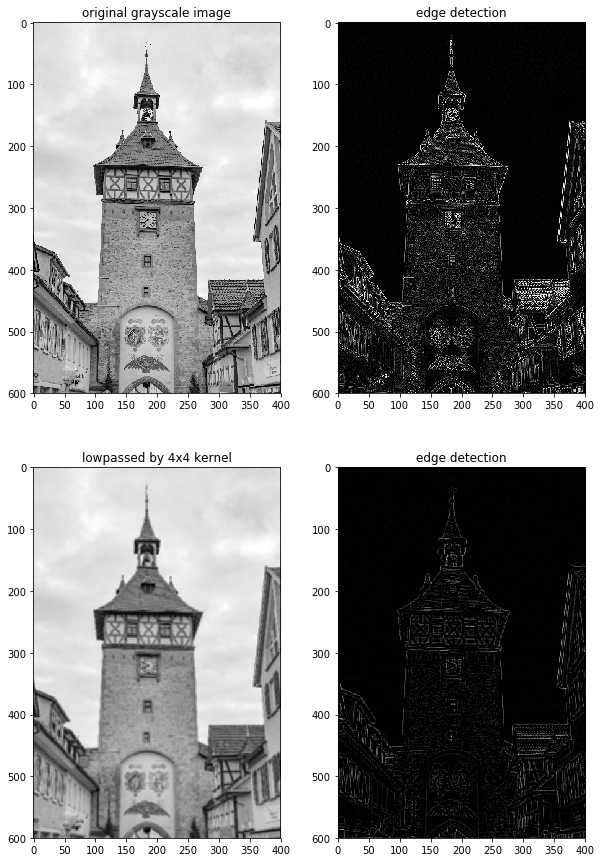

In [139]:
# edge detection kernel
k_edge = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])
plt.figure(figsize=(10, 15))
plt.subplot(221)
plt.imshow(gray, cmap='gray')
plt.title('original grayscale image')

plt.subplot(222)
edge = cv2.filter2D(gray, -1, k_edge)
plt.imshow(edge, cmap='gray')
plt.title('edge detection')

plt.subplot(223)
filtered = cv2.filter2D(gray, -1, k)
plt.imshow(filtered, cmap='gray')
plt.title('lowpassed by 4x4 kernel')

plt.subplot(224)
filtered_edge = cv2.filter2D(filtered, -1, k_edge)
plt.imshow(filtered_edge, cmap='gray')
plt.title('edge detection')

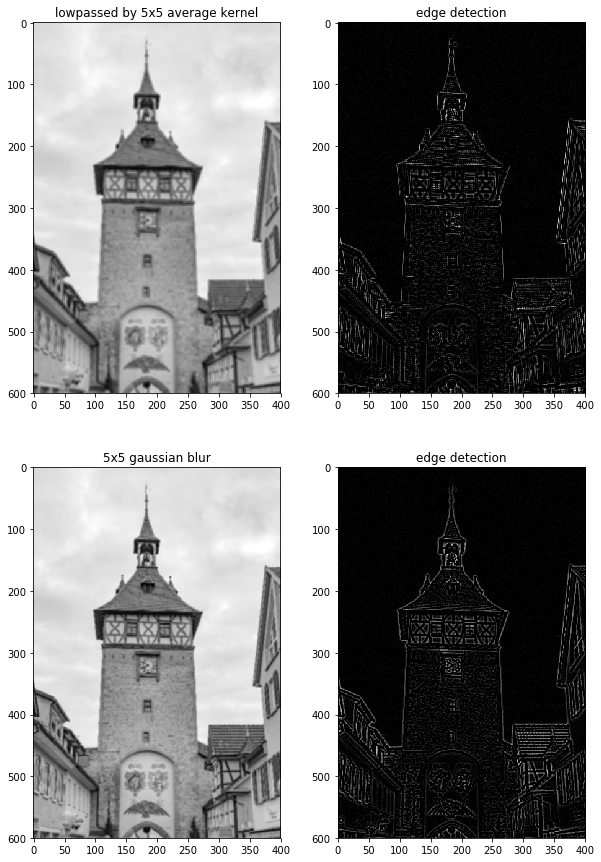

In [143]:
# compare with guassian blur
plt.figure(figsize=(10, 15))
plt.subplot(221)
k = np.ones((5, 5))
k = k / k.size
filtered = cv2.filter2D(gray, -1, k)
plt.imshow(filtered, cmap='gray')
plt.title('lowpassed by 5x5 average kernel')

plt.subplot(222)
filtered_edge = cv2.filter2D(filtered, -1, k_edge)
plt.imshow(filtered_edge, cmap='gray')
plt.title('edge detection')

plt.subplot(223)
filtered_gauss = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(filtered_gauss, cmap='gray')
plt.title('5x5 gaussian blur')

plt.subplot(224)
filtered_edge = cv2.filter2D(filtered_gauss, -1, k_edge)
plt.imshow(filtered_edge, cmap='gray')
plt.title('edge detection')